In [140]:
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt
import cv2

### Part 1

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


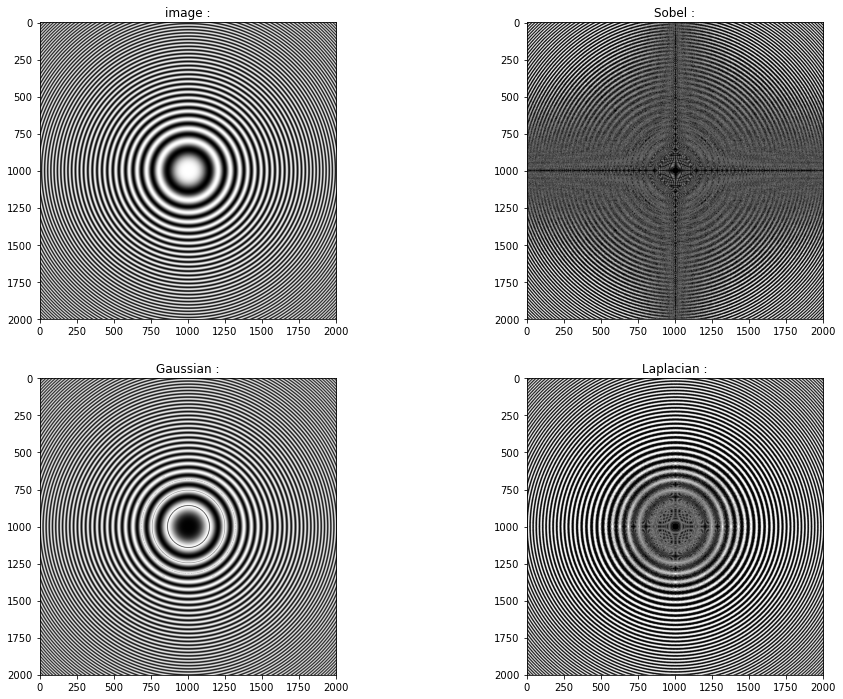

In [141]:
img = iio.imread('q5.png')

res1 = cv2.Sobel(img, cv2.CV_64F, 1, 2, 0).astype(np.uint8)
res2 = cv2.GaussianBlur(img,(3,3),10)
res3 = cv2.Laplacian(img, cv2.CV_64F, (3,3)).astype(np.uint8)

plt.figure(figsize = (16, 12))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray');
plt.title('image :');

plt.subplot(2,2,2)
plt.imshow(255*res1/np.max(res1),cmap='gray');
plt.title('Sobel :');

plt.subplot(2,2,3)
plt.imshow(255*res2/np.max(res2),cmap='gray');
plt.title('Gaussian :');

plt.subplot(2,2,4)
plt.imshow(255*res3/np.max(res3),cmap='gray');
plt.title('Laplacian :');

iio.imwrite('q5_res01.png',255*res1/np.max(res1))
iio.imwrite('q5_res02.png',255*res2/np.max(res2))
iio.imwrite('q5_res03.png',255*res3/np.max(res3))

### Part 2

### Gaussian Filter (frequency)

In [144]:
import math
def GaussianFilter(nRows, nCols, sigma, highpass=True):
    filter_gauss = np.zeros((nRows,nCols))
    centerI = int((nRows+1)/2)
    centerJ = int((nCols+1)/2)
    for j in range(nCols):
        for i in range(nRows):
            g = math.exp(((i-centerI)**2+(j-centerJ)**2)/(-2*sigma**2))
            if(highpass):
                filter_gauss[i,j] = 1-g
            else:
                filter_gauss[i,j] = g
    return filter_gauss

Lossy conversion from float64 to uint8. Range [-124.80856018335277, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-52.311434733648305, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-50.696076332324196, 255.00000000000003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.947448975778803, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.006252273982062717, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


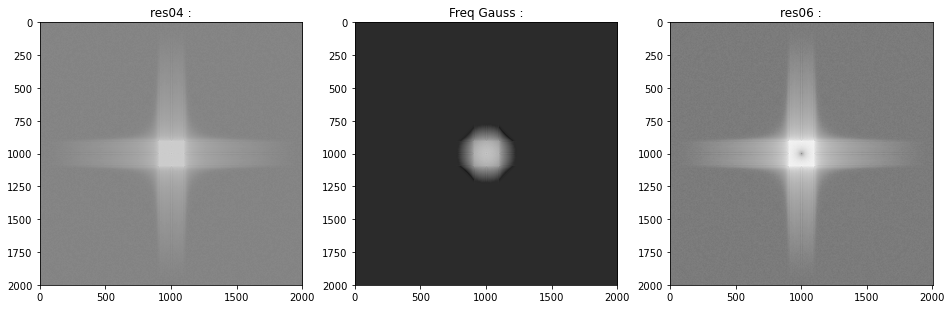

In [145]:
imgf = np.fft.fft2(img)
imgfshift = np.fft.fftshift(imgf)
mag = 20*np.log(np.abs(imgfshift))

rows, cols = img.shape
H_lowpass = GaussianFilter(rows, cols, 50, False)

res5 = (imgfshift*H_lowpass)
res5_mag = 20*np.log(np.abs(1+res5))

res6 = (imgfshift*(1-H_lowpass))
res6_mag = 20*np.log(np.abs(1+res6))

plt.figure(figsize = (16, 12))
plt.subplot(1,3,1)
plt.imshow(mag,cmap='gray');
plt.title('res04 :');

plt.subplot(1,3,2)
plt.imshow(255*res5_mag/np.max(res5_mag),cmap='gray');
plt.title('Freq Gauss :');

plt.subplot(1,3,3)
plt.imshow(255*res6_mag/np.max(res6_mag),cmap='gray');
plt.title('res06 :');


iio.imwrite('q5_res04.png',255*mag/np.max(mag))
iio.imwrite('q5_res05.png',255*res5_mag/np.max(res5_mag))
iio.imwrite('q5_res06.png',255*res6_mag/np.max(res6_mag))


res5_ishift = np.fft.ifftshift(res5)
res6_ishift = np.fft.ifftshift(res6)

res5_back = np.fft.ifft2(res5_ishift)
res6_back = np.fft.ifft2(res6_ishift)

res5_back = np.abs(res5_back)
res6_back = np.abs(res6_back)

iio.imwrite('q5_res07.png',255*res5_back/np.max(res5_back))
iio.imwrite('q5_res08.png',255*res6_back/np.max(res6_back))

### square

In [146]:
import math
def Square(nRows, nCols, C, highpass=True):
    filter_square = np.zeros((nRows,nCols))
    centerI = int((nRows+1)/2)
    centerJ = int((nCols+1)/2)
    for j in range(nCols):
        for i in range(nRows):
            if(abs(i-centerI)<C/2 and abs(j-centerJ)<C/2):
                g = 1
                if(highpass):
                    filter_square[i,j] = 1-g
                else:
                    filter_square[i,j] = g
    return filter_square

Lossy conversion from float64 to uint8. Range [0.0, 255.00000000000003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-50.54623676499763, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.03531219261038618, 254.99999999999997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.012414629315420025, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


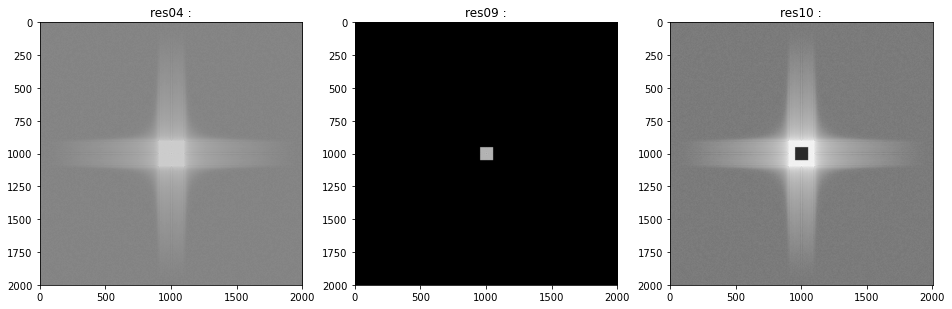

In [147]:
imgf = np.fft.fft2(img)
imgfshift = np.fft.fftshift(imgf)
mag = 20*np.log(np.abs(imgfshift))

rows, cols = img.shape
H_lowpass = Square(rows, cols, 100, False)

res9 = (imgfshift*H_lowpass)
res9_mag = 20*np.log(np.abs(1+res9))

res10 = (imgfshift*(1-H_lowpass))
res10_mag = 20*np.log(np.abs(1+res10))

plt.figure(figsize = (16, 12))
plt.subplot(1,3,1)
plt.imshow(mag,cmap='gray');
plt.title('res04 :');

plt.subplot(1,3,2)
plt.imshow(255*res9_mag/np.max(res9_mag),cmap='gray');
plt.title('res09 :');

plt.subplot(1,3,3)
plt.imshow(255*res10_mag/np.max(res10_mag),cmap='gray');
plt.title('res10 :');


iio.imwrite('q5_res9.png',255*res9_mag/np.max(res9_mag))
iio.imwrite('q5_res10.png',255*res10_mag/np.max(res10_mag))


res9_ishift = np.fft.ifftshift(res9)
res10_ishift = np.fft.ifftshift(res10)

res9_back = np.fft.ifft2(res9_ishift)
res10_back = np.fft.ifft2(res10_ishift)

res9_back = np.abs(res9_back)
res10_back = np.abs(res10_back)

iio.imwrite('q5_res11.png',255*res9_back/np.max(res9_back))
iio.imwrite('q5_res12.png',255*res10_back/np.max(res10_back))

### Part 3

True

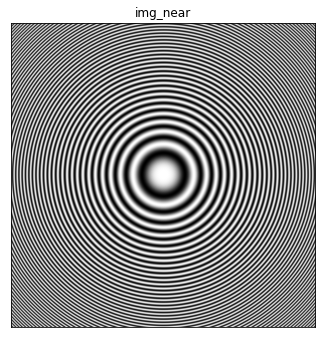

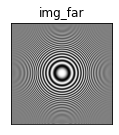

In [148]:
rows, cols = img.shape

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img ,cmap = 'gray')
plt.title('img_near'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(4,4))
plt.subplot(122),plt.imshow(cv2.resize(img, (int(cols/4),int(rows/4))).astype("uint8") ,cmap = 'gray')
plt.title('img_far'), plt.xticks([]), plt.yticks([])

cv2.imwrite("q5_res13.jpg", img)
cv2.imwrite("q5_res14.jpg", cv2.resize(img, (int(cols/16),int(rows/16))).astype(np.uint8))